In [1]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("facebook/nllb-200-distilled-600M",src_lang="hin_Deva",tgt_lang="eng_Latn")
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/nllb-200-distilled-600M",token=True)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/3.55k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/846 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

In [23]:
article = "में छोटा बच्चा हूँ"
inputs = tokenizer(article, return_tensors="pt")

translated_tokens = model.generate(
    **inputs, forced_bos_token_id=tokenizer.encode("eng_Latn")[1], max_length=30
)
tokenizer.batch_decode(translated_tokens, skip_special_tokens=True)[0]

'I am a little child'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = []
with open("/content/drive/MyDrive/IITB.en-hi.en") as f2, open("/content/drive/MyDrive/IITB.en-hi.hi") as f1:
    for src, tgt in zip(f1, f2):
      data.append(
          {
              "translation":{
                  "inputs": src.strip(),
                  "targets": tgt.strip()
              }
          }
      )
print(f'total size of data is {len(data)}')

total size of data is 1659083


In [6]:
import random
random.seed(69)

In [7]:
data_test = []
for i in range(100):
  data_test.append(data[random.randint(1695,10000)])

In [8]:
def data_collector(features: list):
    labels = [f["translation"]["targets"] if "translation" in f else "" for f in features]
    inputs = [f["translation"]["inputs"] if "translation" in f else "" for f in features]
    return inputs, labels

In [9]:
hindi_test,english_test = data_collector(data_test)

In [10]:
english_list=[]
for i in data:
  english_list.append(i['translation']['targets'])

In [11]:
graph_list=[]
english_graph_list=['Co _ mment',
 'Gaps',
 'Italic',
 'Deal another round',
 '_ Accessible',
 'Wins:',
 'No description',
 'Easthaven',
 'Saving',
 'Available new pluginviews',
 'Remove the kings',
 'You are searching for a king.',
 'Seahaven',
 'Thirteen',
 'Treize',
 'Stock left: ~ a',
 'Plugins']

In [12]:
for i in english_graph_list:
  graph_list.append(english_list.index(i))

In [13]:
hindi_list=[]
for i in data:
  hindi_list.append(i['translation']['inputs'])

In [14]:
hindi_graph_list=[]
for i in range(len(graph_list)):
  hindi_graph_list.append(hindi_list[graph_list[i]])

In [15]:
hindi_graph_list_copy=hindi_graph_list
hindi_graph_list_copy[0]="टिप्पणी (_ m)"

In [26]:
encoded_graph_list = []
for i in hindi_graph_list:
  encoded_graph_list.append(tokenizer(i,return_tensors="pt").input_ids.to(model.device))
decoded_graph_list = []
for i in range(len(encoded_graph_list)):
  generated_tokens = model.generate(encoded_graph_list[i],forced_bos_token_id=tokenizer.encode("eng_Latn")[1])
  decoded_graph_list.append(tokenizer.batch_decode(generated_tokens, skip_special_tokens=True))

In [24]:
encoded = tokenizer(hindi_test[0],return_tensors="pt")
generated_tokens = model.generate(**encoded, forced_bos_token_id=tokenizer.encode("eng_Latn")[1])
english_pred = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)

In [29]:
encoded_list = []
for i in hindi_test:
  encoded_list.append(tokenizer(i,return_tensors="pt"))

In [33]:
decoded_list = []
for i in range(len(encoded_list)):
  generated = model.generate(encoded_list[i], forced_bos_token_id=tokenizer.encode("eng_Latn")[1])
  decoded_list.append(tokenizer.batch_decode(generated, skip_special_tokens=True))

AttributeError: 

In [34]:
from nltk.translate.bleu_score import sentence_bleu
weights = (0.25, 0.25, 0, 0)

reference = [['Give', 'your', 'application', 'an', 'accessibility', 'workout']]
predictions = ['Benefit', 'your', 'application', 'from', 'accessibility', 'exercises']

score = sentence_bleu(reference, predictions,weights=weights)
print(score)

0.5623413251903491


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [35]:
def check_bleu(reference,predictions):
  weights = (0.25, 0.25, 0, 0)
  score = sentence_bleu(reference, predictions, weights=weights)
  return score

In [ ]:
scores = []
for i in range(len(decoded_list)):
  print(check_bleu([english_test[i].split()],decoded_list[i][0].split()))
  scores.append(check_bleu([english_test[i].split()],decoded_list[i][0].split()))
for i in range(len(scores)-1):
  if scores[i] < 0.1:
    scores[i] = 1-scores[i]

In [ ]:
from statistics import mean
mean(scores)

In [36]:
from nltk.translate import chrf_score

In [37]:
def check_chrf(reference,predictions):
  score = chrf_score.sentence_chrf(reference, predictions,min_len=1,max_len=3)
  return score

In [38]:
graph_chrf=[]
for i in range(len(decoded_graph_list)):
  graph_chrf.append(check_chrf([english_graph_list[i].lower()],decoded_graph_list[i][0].lower()))

In [40]:
import matplotlib.pyplot as plt

In [42]:
import pandas as pd
from pathlib import Path
from matplotlib.font_manager import FontProperties

# point to the font location with an absolute path
nirm = Path('/content/drive/MyDrive/Nirmala-UI.ttf')

# configure the Hindi font
hindi_font = FontProperties(fname=nirm)

<ipython-input-46-bd3b514b9fb0>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(text, fontproperties=hindi_font)


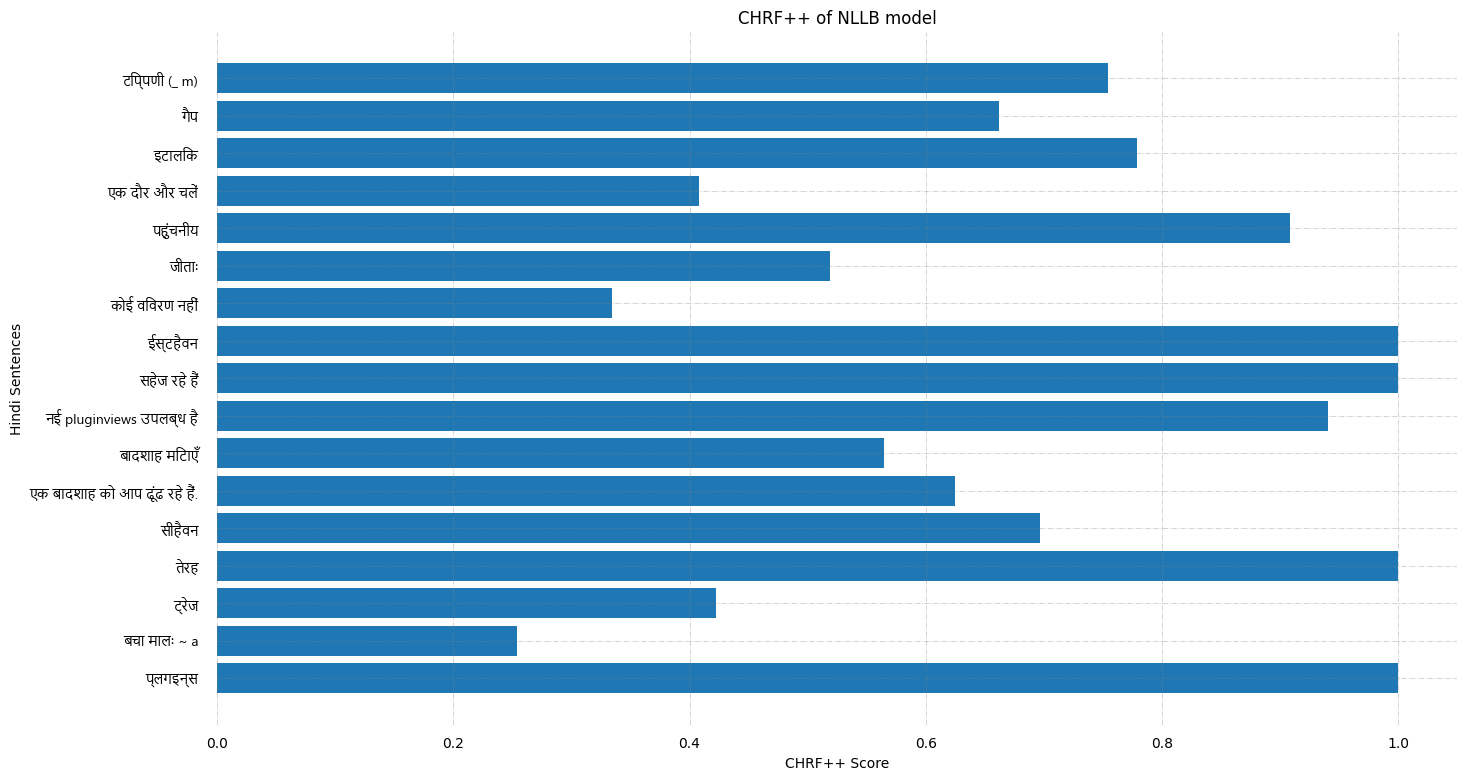

In [46]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(hindi_graph_list_copy, graph_chrf)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

text = [item.get_text() for item in ax.get_yticklabels()]
ax.set_yticklabels(text, fontproperties=hindi_font)
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The width of the bar is the count value and can used as the label
    label_text = f'{width:.02f}'

    label_x = x + width / 2
    label_y = y + height / 2


ax.grid(color ='grey',
        linestyle ='-.', linewidth = 0.6,
        alpha = 0.4)
ax.invert_yaxis()
'''
for i in ax.patches:
    plt.text(i.get_width()+0.02, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
             '''
plt.title('CHRF++ of NLLB model')
plt.xlabel('CHRF++ Score')
plt.ylabel('Hindi Sentences')
plt.show()

In [44]:
graph_bleu=[]
for i in range(len(decoded_graph_list)):
  graph_bleu.append(check_bleu([english_graph_list[i].lower()],decoded_graph_list[i][0].lower()))

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


<ipython-input-47-1c54a42cb77e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(text, fontproperties=hindi_font)


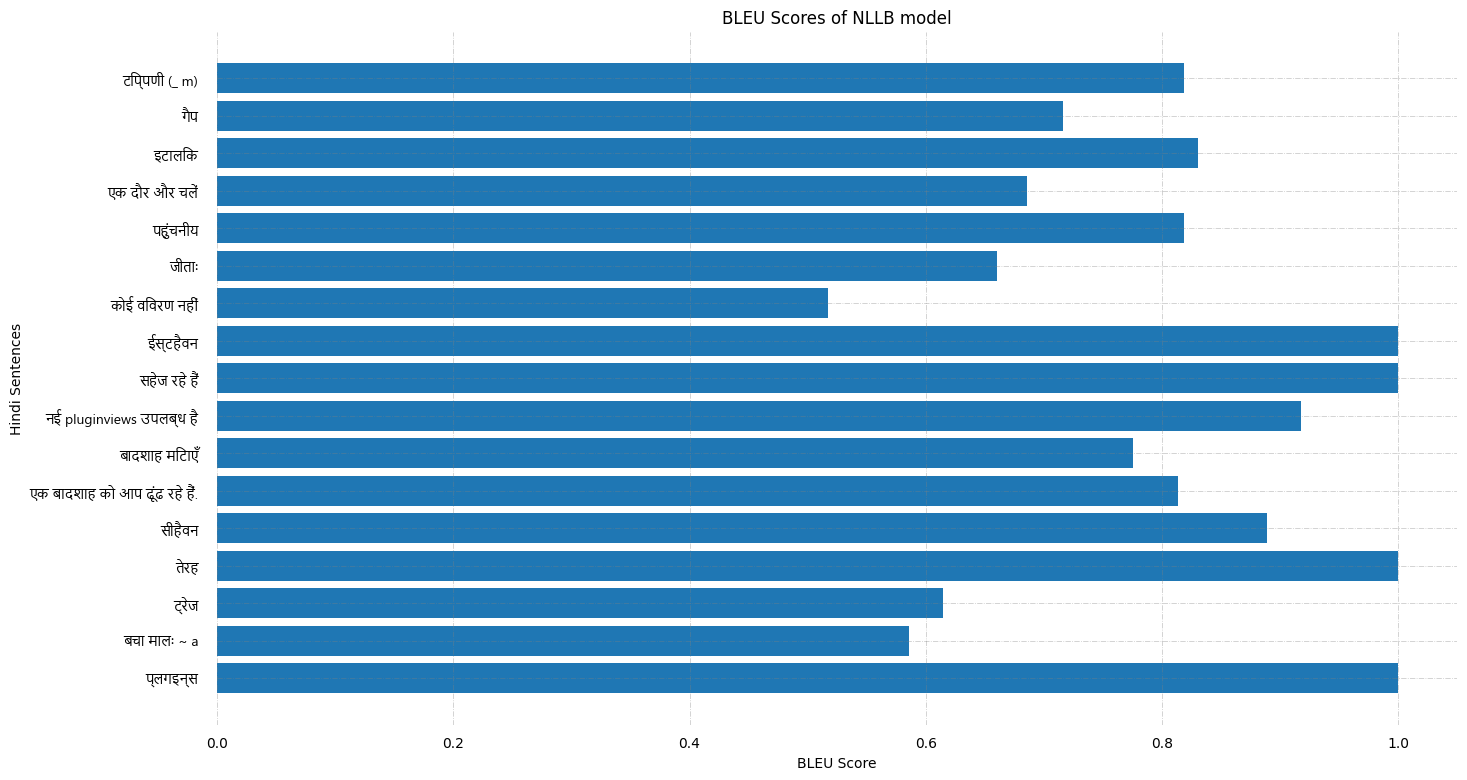

In [47]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(hindi_graph_list, graph_bleu)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

text = [item.get_text() for item in ax.get_yticklabels()]
ax.set_yticklabels(text, fontproperties=hindi_font)
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The width of the bar is the count value and can used as the label
    label_text = f'{width:.02f}'

    label_x = x + width / 2
    label_y = y + height / 2


ax.grid(color ='grey',
        linestyle ='-.', linewidth = 0.6,
        alpha = 0.4)
ax.invert_yaxis()
'''
for i in ax.patches:
    plt.text(i.get_width()+0.02, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
'''
plt.title('BLEU Scores of NLLB model')
plt.xlabel('BLEU Score')
plt.ylabel('Hindi Sentences')
plt.show()

In [49]:
import numpy as np

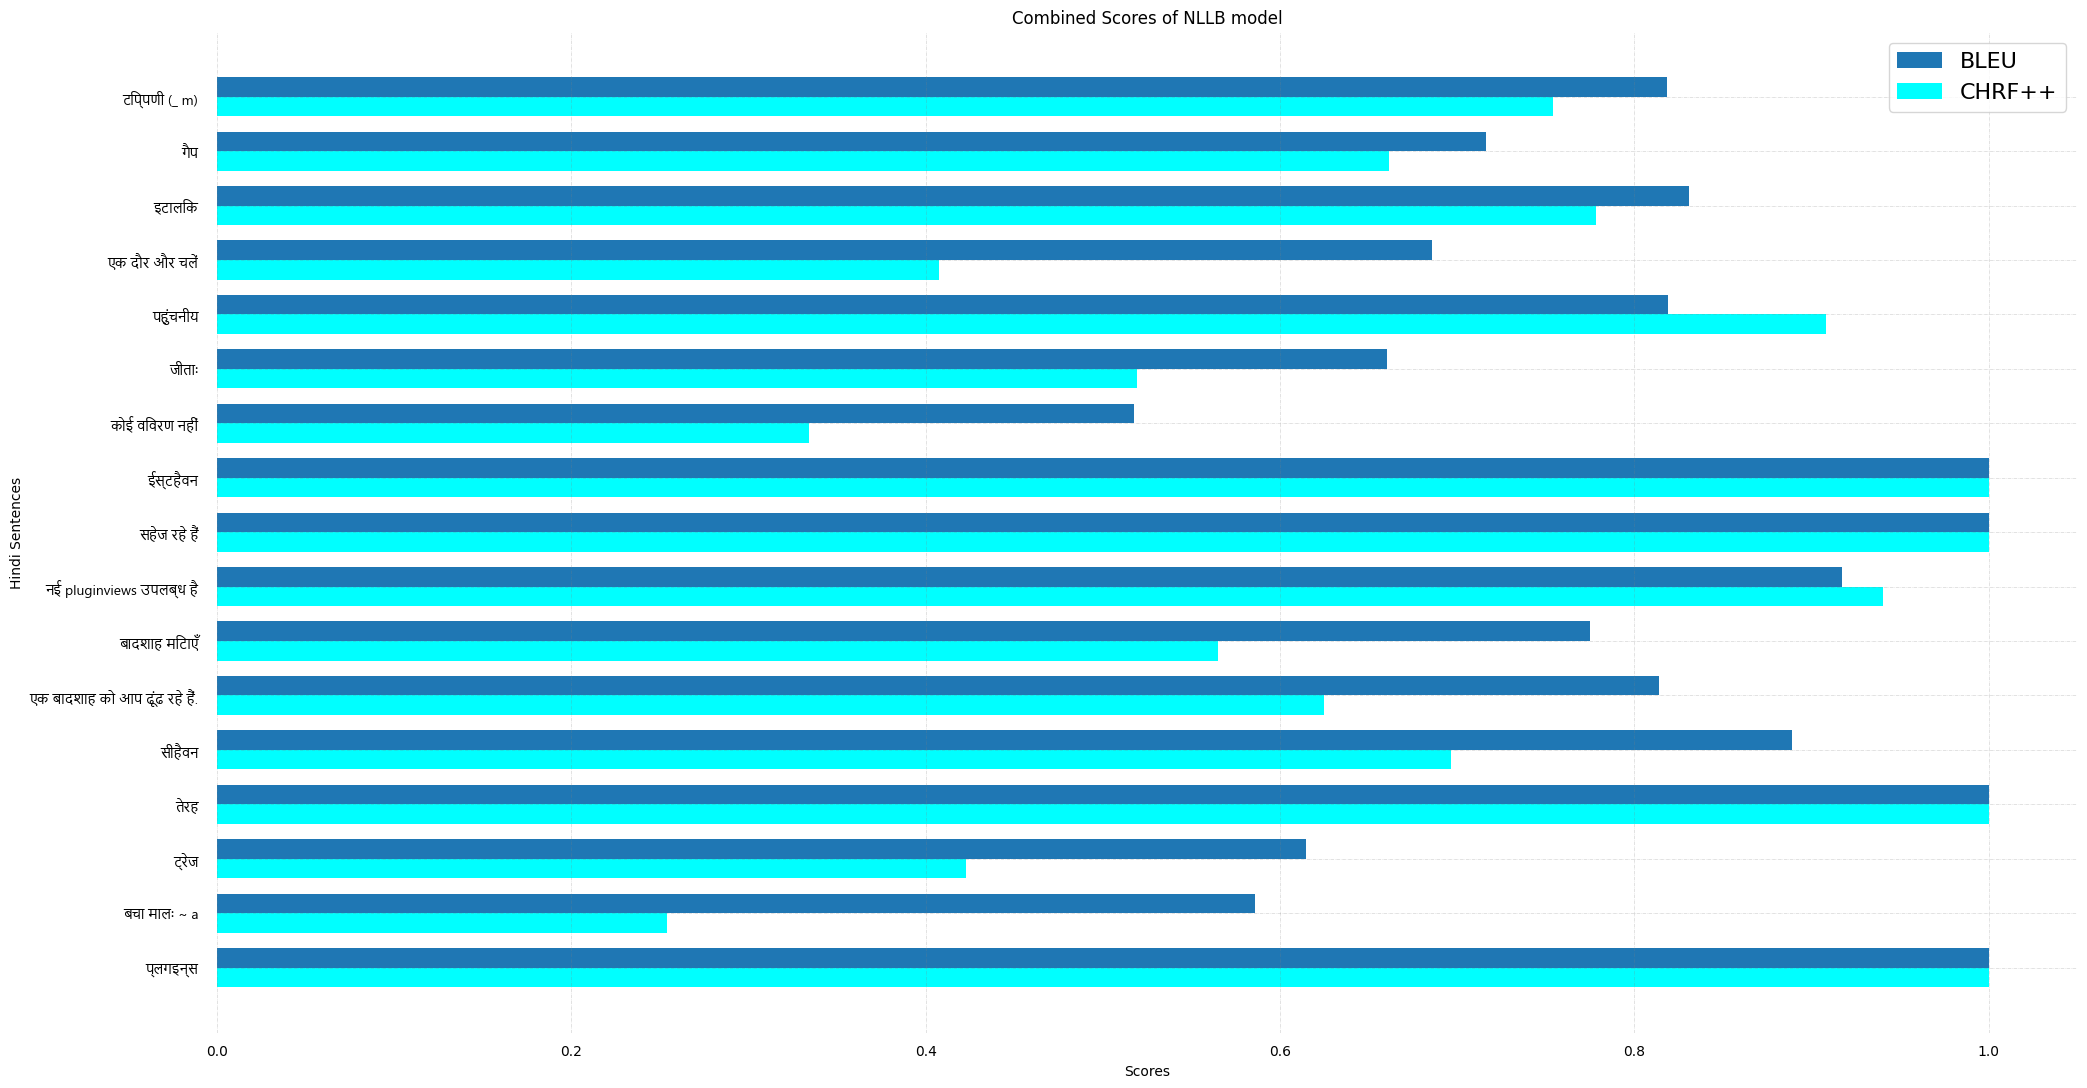

In [50]:
fig, ax = plt.subplots(figsize =(24, 13))
y=np.arange(17)
width=0.36
ax.barh(y-0.18, graph_bleu,width,label='BLEU')
ax.barh(y+0.18, graph_chrf,width,label='CHRF++',color='cyan')
plt.yticks(y, hindi_graph_list_copy)
ax.legend(fontsize=16)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

text = [item.get_text() for item in ax.get_yticklabels()]
ax.set_yticklabels(text, fontproperties=hindi_font)
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The width of the bar is the count value and can used as the label
    label_text = f'{width:.02f}'

    label_x = x + width / 2
    label_y = y + height / 2


ax.grid(color ='grey',
        linestyle ='-.', linewidth = 0.4,
        alpha = 0.4)
ax.invert_yaxis()
'''
for i in ax.patches:
    plt.text(i.get_width()+0.02, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
'''
plt.title('Combined Scores of NLLB model')
plt.xlabel('Scores')
plt.ylabel('Hindi Sentences')
plt.show()